# COVID - 19 ANALİZİ

Bu veri seti 22-01-2020 tarihinden 19-01-2021 tarihine kadar ülkelerde görülen vaka, ölüm ve iyileşen sayısını içermektedir.

In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

In [2]:
confirmed = pd.read_csv("time_series_covid_19_confirmed.csv")
deaths = pd.read_csv("time_series_covid_19_deaths.csv")
recovered = pd.read_csv("time_series_covid_19_recovered.csv")

In [3]:
confirmed.info()
print("-----")
deaths.info()
print("-----")
recovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Columns: 368 entries, Province/State to 1/19/21
dtypes: float64(2), int64(364), object(2)
memory usage: 782.1+ KB
-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Columns: 368 entries, Province/State to 1/19/21
dtypes: float64(2), int64(364), object(2)
memory usage: 782.1+ KB
-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Columns: 368 entries, Province/State to 1/19/21
dtypes: float64(2), int64(364), object(2)
memory usage: 739.0+ KB


In [4]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,53489,53538,53584,53584,53775,53831,53938,53984,54062,54141
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,63595,63971,64627,65334,65994,66635,67216,67690,67982,68568
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,102144,102369,102641,102860,103127,103381,103611,103833,104092,104341
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,8586,8586,8682,8818,8868,8946,9038,9083,9083,9194
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,18193,18254,18343,18425,18613,18679,18765,18875,18926,19011


In [5]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2277,2288,2301,2301,2314,2324,2336,2339,2343,2346
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,1241,1247,1252,1256,1261,1265,1270,1277,1281,1287
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2807,2812,2816,2819,2822,2827,2831,2836,2840,2843
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,85,85,86,87,88,88,91,91,91,92
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,416,420,422,424,425,428,431,436,439,442


In [6]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2277,2288,2301,2301,2314,2324,2336,2339,2343,2346
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,1241,1247,1252,1256,1261,1265,1270,1277,1281,1287
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2807,2812,2816,2819,2822,2827,2831,2836,2840,2843
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,85,85,86,87,88,88,91,91,91,92
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,416,420,422,424,425,428,431,436,439,442


In [8]:
# Veri setinde vaka, ölüm, iyileşen sayıları ilk günden o güne kadar olan toplam sayıyı vermektedir. 
#Yani toplam vaka, ölüm, iyileşen sayısını bulmak için son sütunu toplamamız gerekir.
print("Dünya Toplam Vaka Sayısı : ",confirmed["1/19/21"].sum())
print("Dünya Toplam Ölüm Sayısı : ",deaths["1/19/21"].sum())
print("Dünya Toplam İyileşen Sayısı : ",recovered["1/19/21"].sum())

Dünya Toplam Vaka Sayısı :  96158735
Dünya Toplam Ölüm Sayısı :  2056996
Dünya Toplam İyileşen Sayısı :  53035240


In [9]:
# En çok vaka sayısına sahip ilk 15 ülke
confirmed.sort_values(["1/19/21"], ascending = False)[["Country/Region","1/19/21"]].head(15)

,Country/Region,1/19/21
248,US,24246830
146,India,10595639
30,Brazil,8573864
212,Russia,3574330
262,United Kingdom,3466849
129,France,2931050
152,Italy,2400598
247,Turkey,2399781
232,Spain,2370742
133,Germany,2071615


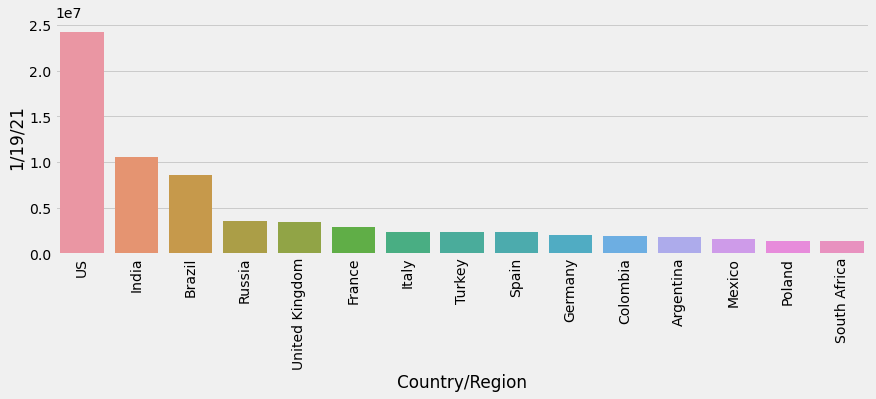

In [18]:
plt.figure(figsize = (13,4))
sns.barplot(x = "Country/Region", y= "1/19/21", data = confirmed.sort_values(["1/19/21"], ascending = False).head(15))
plt.xticks(rotation = 90)
plt.show()

In [19]:
# En çok ölüm sayısına sahip ilk 15 ülke
deaths.sort_values(["1/19/21"], ascending = False)[["Country/Region","1/19/21"]].head(15)

,Country/Region,1/19/21
248,US,401553
30,Brazil,211491
146,India,152718
181,Mexico,142832
262,United Kingdom,91470
152,Italy,83157
129,France,70963
212,Russia,65632
148,Iran,56973
232,Spain,54173


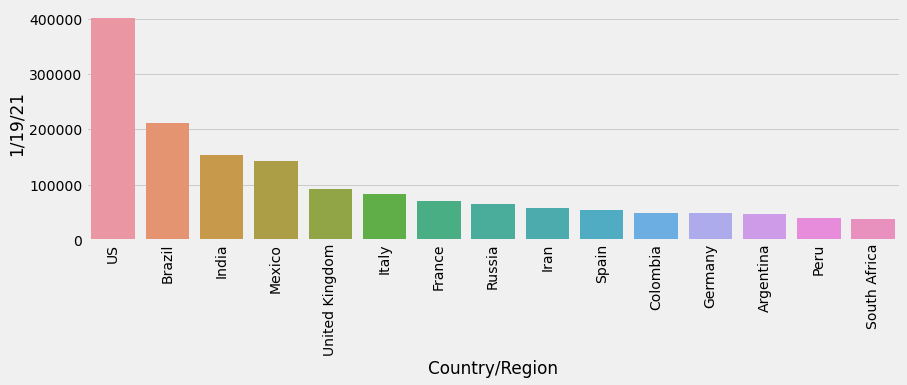

In [20]:
plt.figure(figsize = (13,4))
sns.barplot(x = "Country/Region", y= "1/19/21", data = deaths.sort_values(["1/19/21"], ascending = False).head(15))
plt.xticks(rotation = 90)
plt.show()

In [21]:
# En çok iyileşen sayısına sahip ilk 15 ülke
recovered.sort_values(["1/19/21"], ascending = False)[["Country/Region","1/19/21"]].head(15)

,Country/Region,1/19/21
131,India,10245741
30,Brazil,7618080
197,Russia,2970450
232,Turkey,2277987
137,Italy,1781917
76,Colombia,1769935
118,Germany,1757713
6,Argentina,1604373
166,Mexico,1251782
193,Poland,1197034


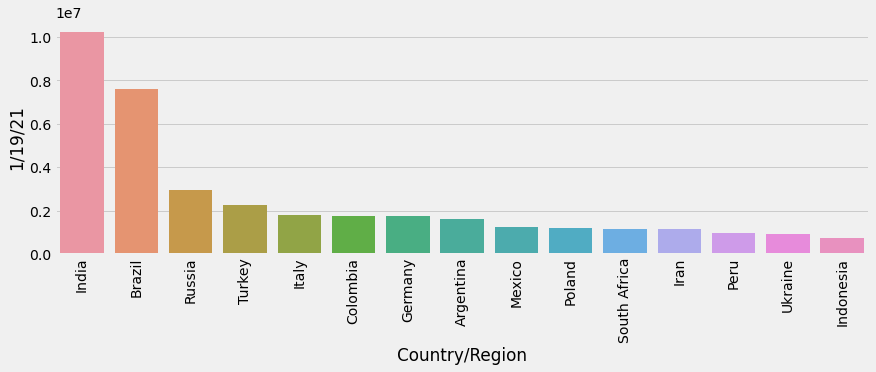

In [22]:
plt.figure(figsize = (13,4))
sns.barplot(x = "Country/Region", y= "1/19/21", data = recovered.sort_values(["1/19/21"], ascending = False).head(15))
plt.xticks(rotation = 90)
plt.show()

In [23]:
x = recovered.iloc[:,4:]
tarih = x.columns

In [24]:
dunya_vaka_sayisi=[]
dunya_olum_sayisi=[]
dunya_iyilesen_sayisi=[]

In [25]:
turkiye_vaka=[]
cin_vaka=[]
italya_vaka=[]
ispanya_vaka=[]
fransa_vaka=[]
almanya_vaka=[]
rusya_vaka=[]
uk_vaka=[]

In [26]:
turkiye_olum=[]
cin_olum=[]
italya_olum=[]
ispanya_olum=[]
fransa_olum=[]
almanya_olum=[]
rusya_olum=[]
uk_olum=[]

In [27]:
turkiye_iyilesen=[]
cin_iyilesen=[]
italya_iyilesen=[]
ispanya_iyilesen=[]
fransa_iyilesen=[]
almanya_iyilesen=[]
rusya_iyilesen=[]
uk_iyilesen=[]

In [28]:
for i in tarih:
    dunya_vaka_sayisi.append(confirmed[i].sum())
    dunya_olum_sayisi.append(deaths[i].sum())
    dunya_iyilesen_sayisi.append(recovered[i].sum())
    
    turkiye_vaka.append(confirmed[confirmed["Country/Region"] == "Turkey"][i].sum())
    cin_vaka.append(confirmed[confirmed["Country/Region"] == "China"][i].sum())
    italya_vaka.append(confirmed[confirmed["Country/Region"] == "Italy"][i].sum())
    ispanya_vaka.append(confirmed[confirmed["Country/Region"] == "Spain"][i].sum())
    fransa_vaka.append(confirmed[confirmed["Country/Region"] == "France"][i].sum())
    almanya_vaka.append(confirmed[confirmed["Country/Region"] == "Germany"][i].sum())
    rusya_vaka.append(confirmed[confirmed["Country/Region"] == "Russia"][i].sum())
    uk_vaka.append(confirmed[confirmed["Country/Region"] == "United Kingdom"][i].sum())
    
    turkiye_olum.append(deaths[deaths["Country/Region"] == "Turkey"][i].sum())
    cin_olum.append(deaths[deaths["Country/Region"] == "China"][i].sum())
    italya_olum.append(deaths[deaths["Country/Region"] == "Italy"][i].sum())
    ispanya_olum.append(deaths[deaths["Country/Region"] == "Spain"][i].sum())
    fransa_olum.append(deaths[deaths["Country/Region"] == "France"][i].sum())
    almanya_olum.append(deaths[deaths["Country/Region"] == "Germany"][i].sum())
    rusya_olum.append(deaths[deaths["Country/Region"] == "Russia"][i].sum())  
    uk_olum.append(deaths[deaths["Country/Region"] == "United Kingdom"][i].sum())
    
    turkiye_iyilesen.append(recovered[recovered["Country/Region"] == "Turkey"][i].sum())
    cin_iyilesen.append(recovered[recovered["Country/Region"] == "China"][i].sum())
    italya_iyilesen.append(recovered[recovered["Country/Region"] == "Italy"][i].sum())
    ispanya_iyilesen.append(recovered[recovered["Country/Region"] == "Spain"][i].sum())
    fransa_iyilesen.append(recovered[recovered["Country/Region"] == "France"][i].sum())
    almanya_iyilesen.append(recovered[recovered["Country/Region"] == "Germany"][i].sum())
    rusya_iyilesen.append(recovered[recovered["Country/Region"] == "Russia"][i].sum()) 
    uk_iyilesen.append(recovered[recovered["Country/Region"] == "United Kingdom"][i].sum())

In [29]:
#Günlük artış sayıları
def gunluk_artis(data):
    
    liste=[]
    for i in range(len(data)):
        if i==0:
            liste.append(data[0])
        else:
            liste.append(data[i]-data[i-1])
    return liste

In [30]:
dunya_gunluk_artis=gunluk_artis(dunya_vaka_sayisi)
turkiye_gunluk_artis=gunluk_artis(turkiye_vaka)
cin_gunluk_artis=gunluk_artis(cin_vaka)
italya_gunluk_artis=gunluk_artis(italya_vaka)
ispanya_gunluk_artis=gunluk_artis(ispanya_vaka)
fransa_gunluk_artis=gunluk_artis(fransa_vaka)
almanya_gunluk_artis=gunluk_artis(almanya_vaka)
rusya_gunluk_artis=gunluk_artis(rusya_vaka)
uk_gunluk_artis=gunluk_artis(uk_vaka)

In [31]:
dunya_gunluk_olum=gunluk_artis(dunya_olum_sayisi)
turkiye_gunluk_olum=gunluk_artis(turkiye_olum)
cin_gunluk_olum=gunluk_artis(cin_olum)
italya_gunluk_olum=gunluk_artis(italya_olum)
ispanya_gunluk_olum=gunluk_artis(ispanya_olum)
fransa_gunluk_olum=gunluk_artis(fransa_olum)
almanya_gunluk_olum=gunluk_artis(almanya_olum)
rusya_gunluk_olum=gunluk_artis(rusya_olum)
uk_gunluk_olum=gunluk_artis(uk_olum)

In [32]:
dunya_gunluk_iyilesen=gunluk_artis(dunya_iyilesen_sayisi)
turkiye_gunluk_iyilesen=gunluk_artis(turkiye_iyilesen)
cin_gunluk_iyilesen=gunluk_artis(cin_iyilesen)
italya_gunluk_iyilesen=gunluk_artis(italya_iyilesen)
ispanya_gunluk_iyilesen=gunluk_artis(ispanya_iyilesen)
fransa_gunluk_iyilesen=gunluk_artis(fransa_iyilesen)
almanya_gunluk_iyilesen=gunluk_artis(almanya_iyilesen)
rusya_gunluk_iyilesen=gunluk_artis(rusya_iyilesen)
uk_gunluk_iyilesen=gunluk_artis(uk_iyilesen)

In [33]:
#Genel Görselleştirme

In [54]:
gunler = np.arange(0,200)

In [55]:
def gunluk_gorsellestirme(recovered, deaths, confirmed, country):
    plt.figure(figsize = (15,6))
    sns.lineplot(x = gunler, y = confirmed[0:200])
    sns.lineplot(x = gunler, y = deaths[0:200])
    sns.lineplot(x = gunler, y = recovered[0:200])
    plt.title("{} 200 Günlük Değişim".format(country))
    plt.legend(["Confirmed", "Deaths", "Recovered"])
    plt.show()

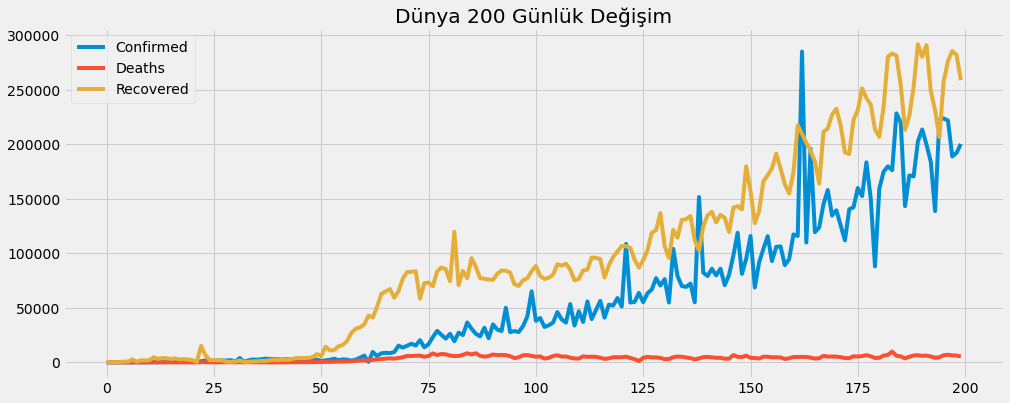

In [56]:
#Dünya
gunluk_gorsellestirme(dunya_gunluk_artis, dunya_gunluk_olum, dunya_gunluk_iyilesen,"Dünya" )

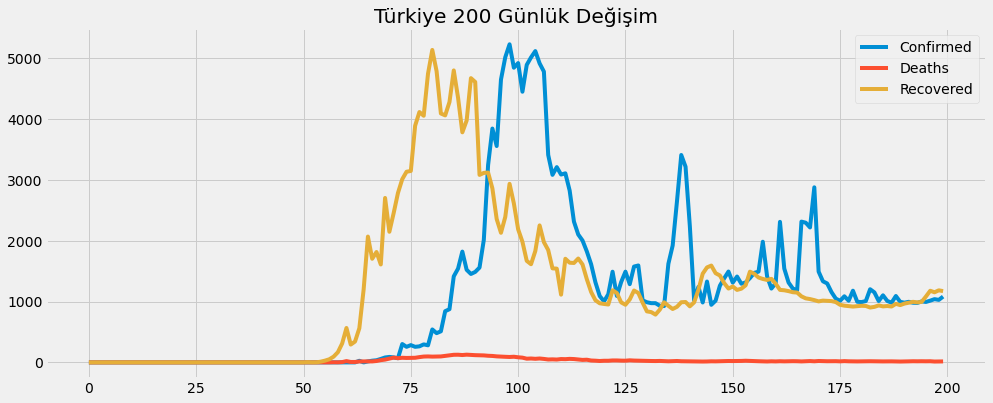

In [57]:
#Türkiye
gunluk_gorsellestirme(turkiye_gunluk_artis, turkiye_gunluk_olum, turkiye_gunluk_iyilesen, "Türkiye")

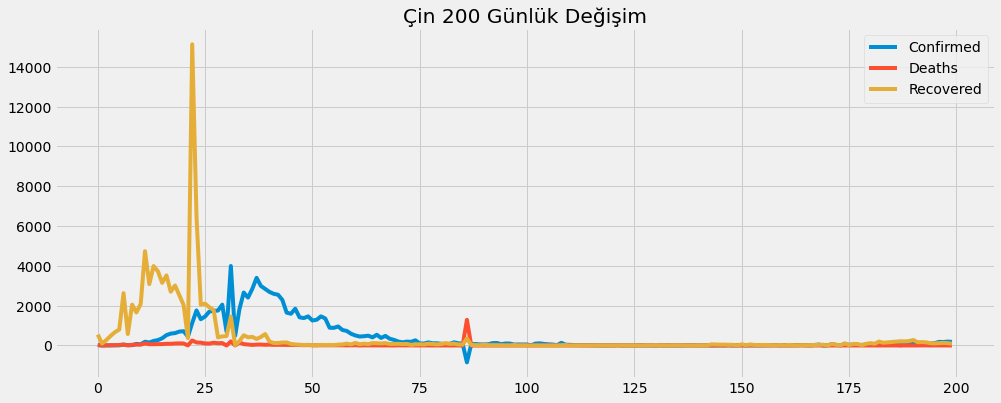

In [60]:
#Çin
gunluk_gorsellestirme(cin_gunluk_artis, cin_gunluk_olum, cin_gunluk_iyilesen, "Çin")

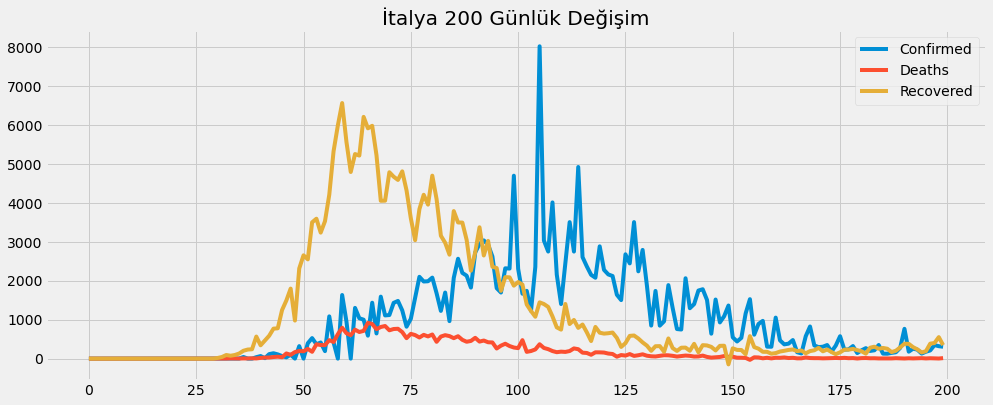

In [61]:
#İtalya
gunluk_gorsellestirme(italya_gunluk_artis, italya_gunluk_olum, italya_gunluk_iyilesen, "İtalya")

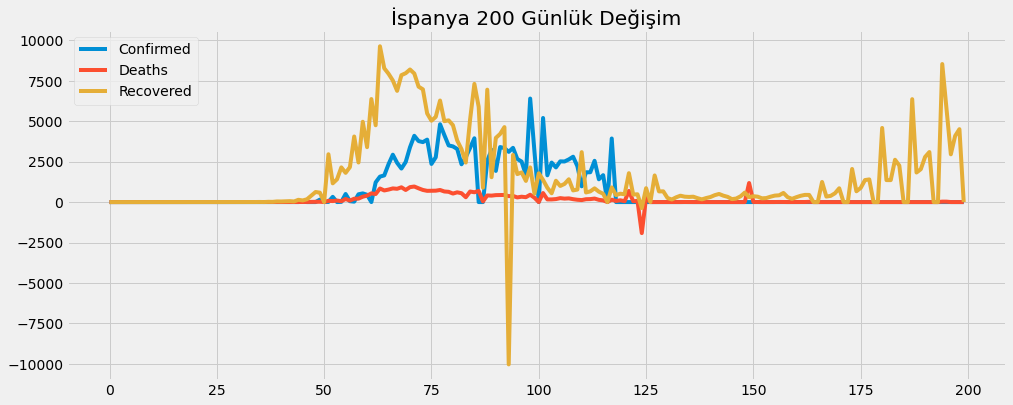

In [63]:
#İspanya
gunluk_gorsellestirme(ispanya_gunluk_artis, ispanya_gunluk_olum, ispanya_gunluk_iyilesen, "İspanya")

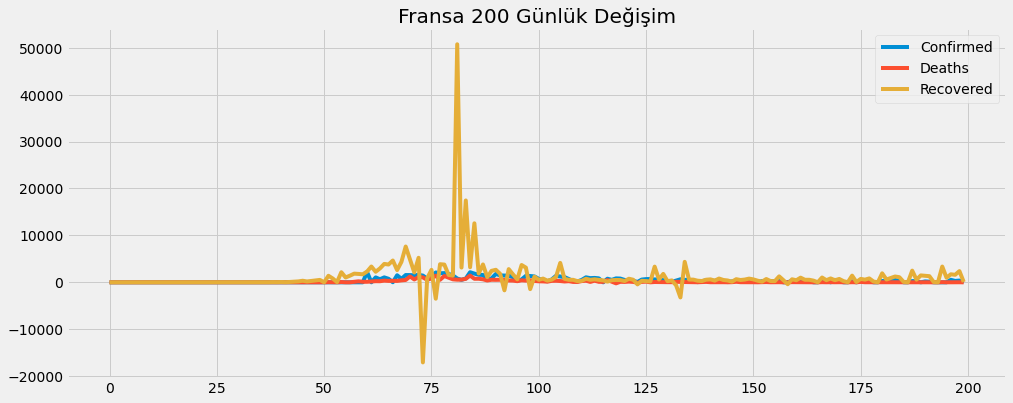

In [64]:
#Fransa
gunluk_gorsellestirme(fransa_gunluk_artis, fransa_gunluk_olum, fransa_gunluk_iyilesen, "Fransa")

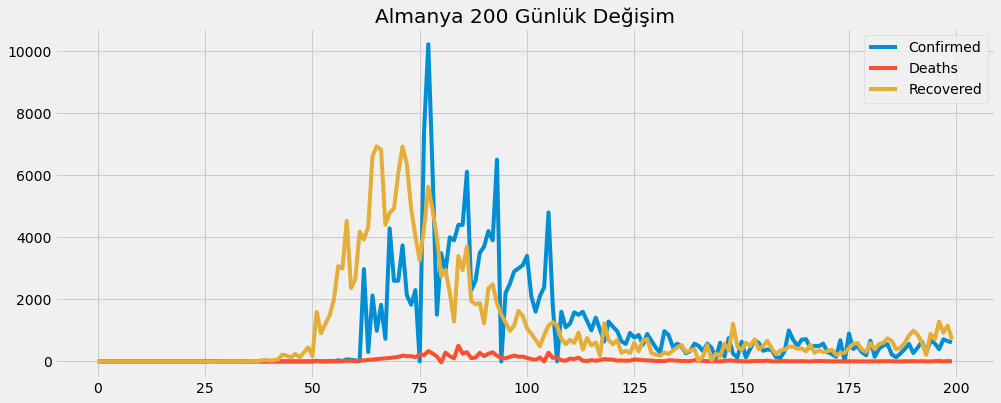

In [65]:
#Almanya
gunluk_gorsellestirme(almanya_gunluk_artis, almanya_gunluk_olum, almanya_gunluk_iyilesen, "Almanya")

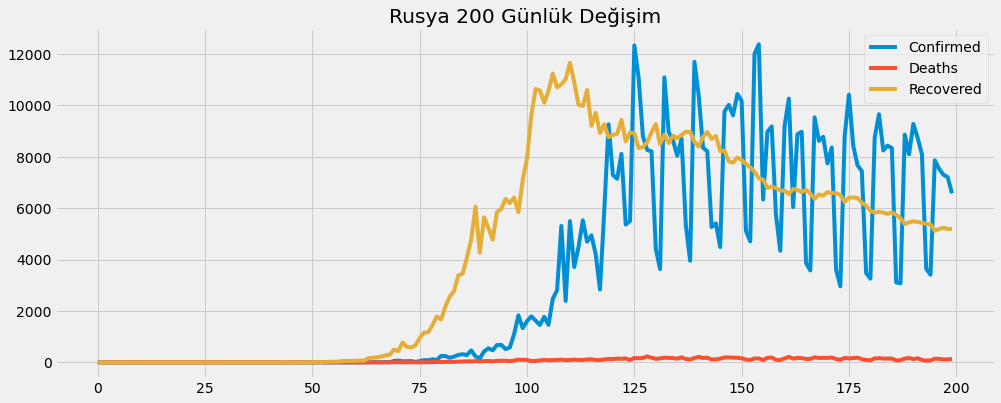

In [66]:
#Rusya
gunluk_gorsellestirme(rusya_gunluk_artis, rusya_gunluk_olum, rusya_gunluk_iyilesen, "Rusya")

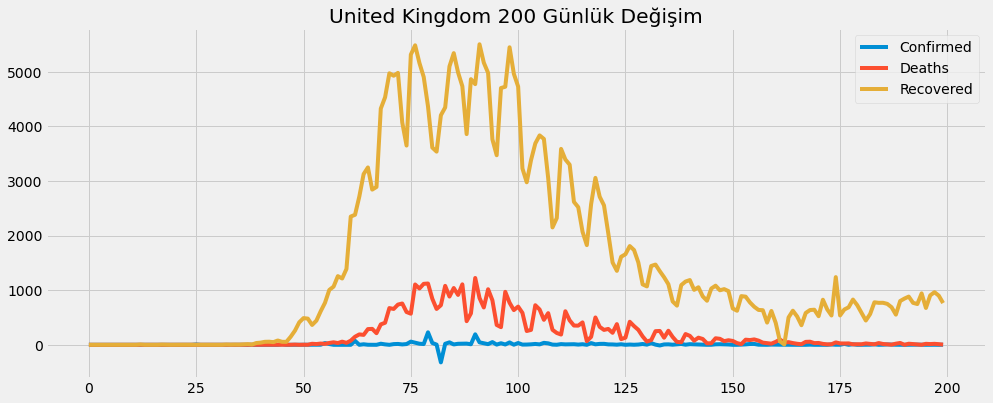

In [67]:
#United Kingdom
gunluk_gorsellestirme(uk_gunluk_artis, uk_gunluk_olum, uk_gunluk_iyilesen, "United Kingdom")

In [68]:
#Ülkelerin 364 günlük toplam vaka sayıları

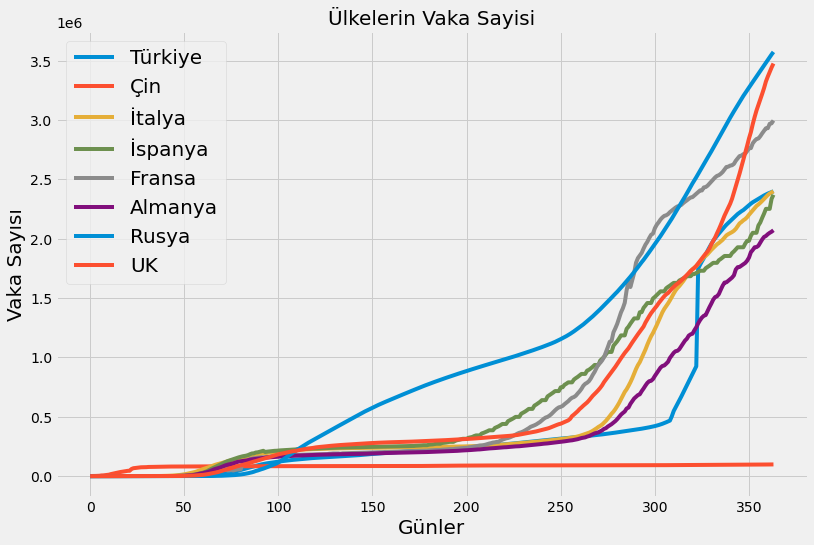

In [70]:
plt.figure(figsize=(12,8))
plt.plot(turkiye_vaka)
plt.plot(cin_vaka)
plt.plot(italya_vaka)
plt.plot(ispanya_vaka)
plt.plot(fransa_vaka)
plt.plot(almanya_vaka)
plt.plot(rusya_vaka)
plt.plot(uk_vaka)
plt.title("Ülkelerin Vaka Sayisi",size=20)
plt.xlabel("Günler",size=20)
plt.ylabel("Vaka Sayısı",size=20)
plt.legend(["Türkiye","Çin","İtalya","İspanya","Fransa","Almanya","Rusya","UK"],prop={"size":20})
plt.show()

In [71]:
# Ülkelerin 364 gün toplam ölüm sayıları

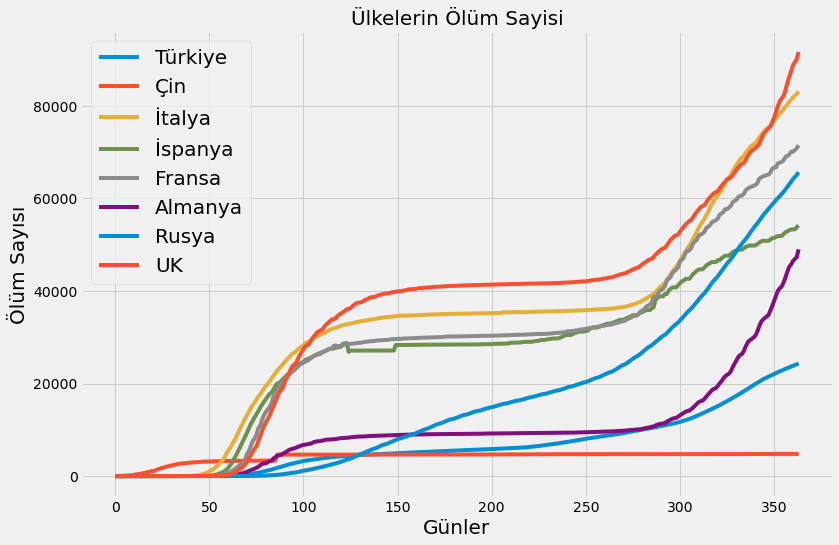

In [72]:
plt.figure(figsize=(12,8))
plt.plot(turkiye_olum)
plt.plot(cin_olum)
plt.plot(italya_olum)
plt.plot(ispanya_olum)
plt.plot(fransa_olum)
plt.plot(almanya_olum)
plt.plot(rusya_olum)
plt.plot(uk_olum)
plt.title("Ülkelerin Ölüm Sayisi",size=20)
plt.xlabel("Günler",size=20)
plt.ylabel("Ölüm Sayısı",size=20)
plt.legend(["Türkiye","Çin","İtalya","İspanya","Fransa","Almanya","Rusya","UK"],prop={"size":20})
plt.show()

In [73]:
# Ülkelerin 364 günlük toplam iyileşen sayıları

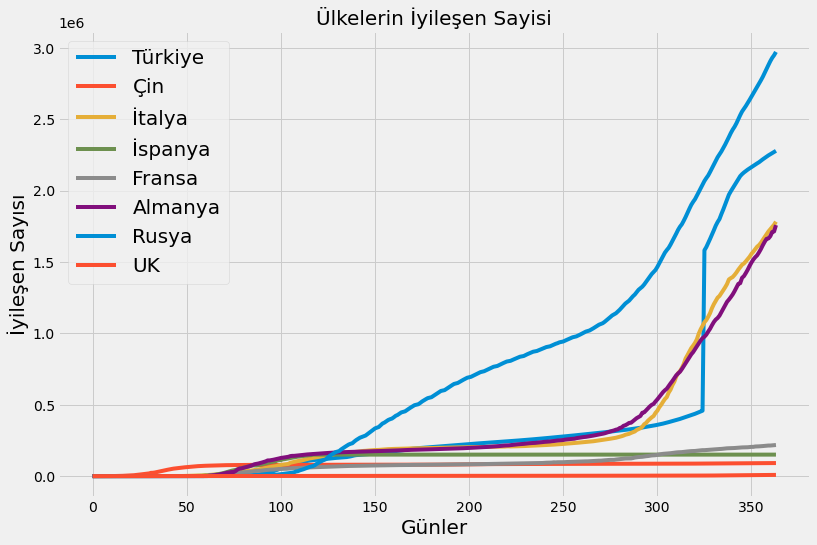

In [74]:
plt.figure(figsize=(12,8))
plt.plot(turkiye_iyilesen)
plt.plot(cin_iyilesen)
plt.plot(italya_iyilesen)
plt.plot(ispanya_iyilesen)
plt.plot(fransa_iyilesen)
plt.plot(almanya_iyilesen)
plt.plot(rusya_iyilesen)
plt.plot(uk_iyilesen)
plt.title("Ülkelerin İyileşen Sayisi",size=20)
plt.xlabel("Günler",size=20)
plt.ylabel("İyileşen Sayısı",size=20)
plt.legend(["Türkiye","Çin","İtalya","İspanya","Fransa","Almanya","Rusya","UK"],prop={"size":20})
plt.show()